In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_fake=pd.read_csv(r"/content/drive/MyDrive/Datasets/Fake.csv")
df_true=pd.read_csv(r"/content/drive/MyDrive/Datasets/True.csv")

In [4]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
#Classification or Labelling
df_fake["class"] = 0
df_true["class"] = 1

In [9]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [10]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   class    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [13]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   class    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [14]:
df_all = pd.concat([df_fake, df_true], axis=0)

In [15]:
df_all

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [16]:
df_all.drop(['subject','date'], axis=1, inplace=True)

In [17]:
df_all.head()

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [18]:
# Combining 'title' and 'text' columns into a single 'texts' column
df_all['texts'] = df_all['title'] + " " + df_all['text']
df_all.drop(['title', 'text'], axis=1, inplace=True)

In [19]:
df_all

,class,texts
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...
21412,1,'Fully committed' NATO backs new U.S. approach...
21413,1,LexisNexis withdrew two products from Chinese ...
21414,1,Minsk cultural hub becomes haven from authorit...
21415,1,Vatican upbeat on possibility of Pope Francis ...


In [20]:
#checking for any null values in the entire dataset
any_null = df_all.isnull().any()
any_null

class    False
texts    False
dtype: bool

In [21]:
#lowercasing all instances in the texts column
df_all['texts'] = df_all['texts'].str.lower()

In [22]:
df_all.head()

,class,texts
0,0,donald trump sends out embarrassing new year’...
1,0,drunk bragging trump staffer started russian ...
2,0,sheriff david clarke becomes an internet joke...
3,0,trump is so obsessed he even has obama’s name...
4,0,pope francis just called out donald trump dur...


In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
#TOKENIZATION
#Defining a function to tokenize texts using NLTK
def tokenize_text(text):
    # Tokenize the text using NLTK's word_tokenize
    tokens = word_tokenize(text)
    return tokens

In [25]:
df_all.head()

,class,texts
0,0,donald trump sends out embarrassing new year’...
1,0,drunk bragging trump staffer started russian ...
2,0,sheriff david clarke becomes an internet joke...
3,0,trump is so obsessed he even has obama’s name...
4,0,pope francis just called out donald trump dur...


In [26]:
#Applying the tokenize_text function to the 'texts' column and creating a new column 'tokens'
df_all['tokens'] = df_all['texts'].apply(tokenize_text)

In [27]:
def remove_punctuation(tokens):
    # Define a set of punctuation characters
    punctuation = set(string.punctuation)
    # Removing punctuation and special characters from each token and filtering out empty tokens
    cleaned_tokens = [token for token in tokens if token not in punctuation and token.strip()]
    return cleaned_tokens

In [28]:
df_all['cleaned_tokens'] = df_all['tokens'].apply(remove_punctuation)

In [29]:
df_all.head()

,class,texts,tokens,cleaned_tokens
0,0,donald trump sends out embarrassing new year’...,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, out, embarrassing, new,..."
1,0,drunk bragging trump staffer started russian ...,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus..."
2,0,sheriff david clarke becomes an internet joke...,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, an, internet..."
3,0,trump is so obsessed he even has obama’s name...,"[trump, is, so, obsessed, he, even, has, obama...","[trump, is, so, obsessed, he, even, has, obama..."
4,0,pope francis just called out donald trump dur...,"[pope, francis, just, called, out, donald, tru...","[pope, francis, just, called, out, donald, tru..."


In [30]:
df_all['tokens'].apply(len)

0        614
1        339
2        706
3        537
4        469
        ... 
21412    515
21413    149
21414    365
21415    232
21416    243
Name: tokens, Length: 44898, dtype: int64

In [31]:
df_all['cleaned_tokens'].apply(len)

0        506
1        313
2        597
3        462
4        431
        ... 
21412    467
21413    131
21414    325
21415    213
21416    217
Name: cleaned_tokens, Length: 44898, dtype: int64

In [32]:
#Joining the tokens back into cleaned texts
def join_tokens(tokens):
    # Join tokens back into cleaned text using a space as the delimiter
    cleaned_text = " ".join(tokens)
    return cleaned_text

In [33]:
df_all['cleaned_texts'] = df_all['tokens'].apply(join_tokens)

In [34]:
df_all.head()

,class,texts,tokens,cleaned_tokens,cleaned_texts
0,0,donald trump sends out embarrassing new year’...,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, out, embarrassing, new,...",donald trump sends out embarrassing new year ’...
1,0,drunk bragging trump staffer started russian ...,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus...",drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke...,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, an, internet...",sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama’s name...,"[trump, is, so, obsessed, he, even, has, obama...","[trump, is, so, obsessed, he, even, has, obama...",trump is so obsessed he even has obama ’ s nam...
4,0,pope francis just called out donald trump dur...,"[pope, francis, just, called, out, donald, tru...","[pope, francis, just, called, out, donald, tru...",pope francis just called out donald trump duri...


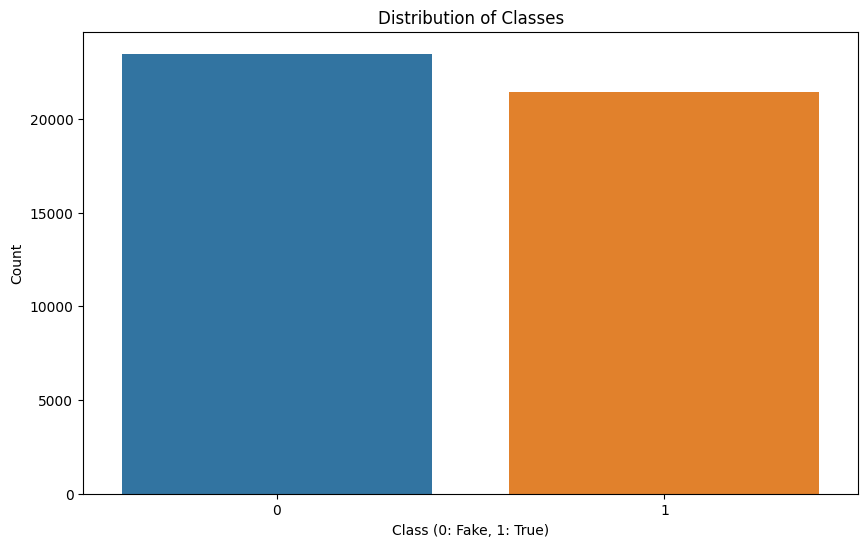

In [35]:
#EDA
#Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df_all)
plt.title('Distribution of Classes')
plt.xlabel('Class (0: Fake, 1: True)')
plt.ylabel('Count')
plt.show()

In [36]:
df_fake.shape

(23481, 5)

In [37]:
df_true.shape

(21417, 5)

In [38]:
#Word count
df_all['word_count'] = df_all['cleaned_tokens'].apply(len)
df_all.head()

,class,texts,tokens,cleaned_tokens,cleaned_texts,word_count
0,0,donald trump sends out embarrassing new year’...,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, out, embarrassing, new,...",donald trump sends out embarrassing new year ’...,506
1,0,drunk bragging trump staffer started russian ...,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus...",drunk bragging trump staffer started russian c...,313
2,0,sheriff david clarke becomes an internet joke...,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, an, internet...",sheriff david clarke becomes an internet joke ...,597
3,0,trump is so obsessed he even has obama’s name...,"[trump, is, so, obsessed, he, even, has, obama...","[trump, is, so, obsessed, he, even, has, obama...",trump is so obsessed he even has obama ’ s nam...,462
4,0,pope francis just called out donald trump dur...,"[pope, francis, just, called, out, donald, tru...","[pope, francis, just, called, out, donald, tru...",pope francis just called out donald trump duri...,431


In [39]:
# Group the data by class ('fake' or 'real')
grouped_data = df_all.groupby('class')['word_count'].mean()

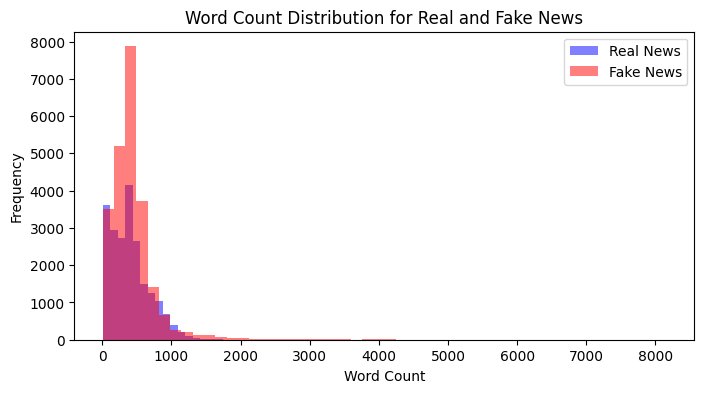

In [40]:
# Separate the data into 'real' and 'fake' news
real_news = df_all[df_all['class'] == 1]
fake_news = df_all[df_all['class'] == 0]

# Plot histograms for word count
plt.figure(figsize=(8, 4))
plt.hist(real_news['word_count'], bins=50, color='blue', alpha=0.5, label='Real News')
plt.hist(fake_news['word_count'], bins=50, color='red', alpha=0.5, label='Fake News')
plt.title("Word Count Distribution for Real and Fake News")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [41]:
from nltk.tokenize import sent_tokenize
df_all['sentence_count'] = df_all['cleaned_texts'].apply(lambda x: len(sent_tokenize(" ".join(x))))
print(df_all[['cleaned_texts', 'sentence_count']])

                                           cleaned_texts  sentence_count
0      donald trump sends out embarrassing new year ’...              38
1      drunk bragging trump staffer started russian c...              20
2      sheriff david clarke becomes an internet joke ...              48
3      trump is so obsessed he even has obama ’ s nam...              34
4      pope francis just called out donald trump duri...              20
...                                                  ...             ...
21412  'fully committed ' nato backs new u.s. approac...              35
21413  lexisnexis withdrew two products from chinese ...               6
21414  minsk cultural hub becomes haven from authorit...              16
21415  vatican upbeat on possibility of pope francis ...               9
21416  indonesia to buy $ 1.14 billion worth of russi...              13

[44898 rows x 2 columns]


In [42]:
df_all.head()

,class,texts,tokens,cleaned_tokens,cleaned_texts,word_count,sentence_count
0,0,donald trump sends out embarrassing new year’...,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, out, embarrassing, new,...",donald trump sends out embarrassing new year ’...,506,38
1,0,drunk bragging trump staffer started russian ...,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus...",drunk bragging trump staffer started russian c...,313,20
2,0,sheriff david clarke becomes an internet joke...,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, an, internet...",sheriff david clarke becomes an internet joke ...,597,48
3,0,trump is so obsessed he even has obama’s name...,"[trump, is, so, obsessed, he, even, has, obama...","[trump, is, so, obsessed, he, even, has, obama...",trump is so obsessed he even has obama ’ s nam...,462,34
4,0,pope francis just called out donald trump dur...,"[pope, francis, just, called, out, donald, tru...","[pope, francis, just, called, out, donald, tru...",pope francis just called out donald trump duri...,431,20


In [43]:
pip install wordcloud

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [46]:
# Combine tokenized text for each class
fake_text = ' '.join(df_all[df_all['class'] == 0]['cleaned_tokens'].apply(lambda x: ' '.join(x)))
real_text = ' '.join(df_all[df_all['class'] == 1]['cleaned_tokens'].apply(lambda x: ' '.join(x)))

In [47]:
# Create word clouds for fake and real news
stop_words = set(stopwords.words('english'))
wordcloud_fake = WordCloud(background_color='white', stopwords=stop_words).generate(fake_text)
wordcloud_real = WordCloud(background_color='white', stopwords=stop_words).generate(real_text)

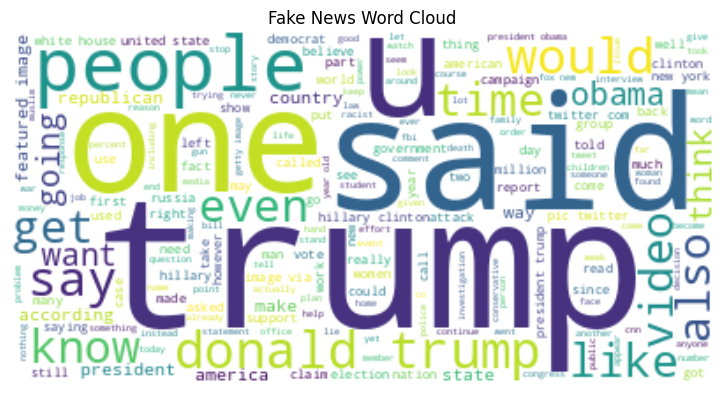

In [48]:
# Plot word clouds
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')
plt.show()

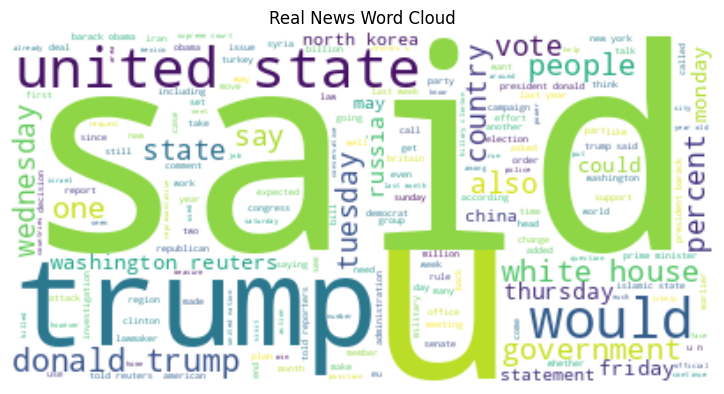

In [49]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')

plt.show()

In [50]:
# Create bar charts for most frequent words
def plot_most_frequent_words(text, title):
    word_list = text.split()
    word_freq = pd.Series(word_list).value_counts()[:15]
    word_freq.plot(kind='bar', figsize=(8, 4), title=title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

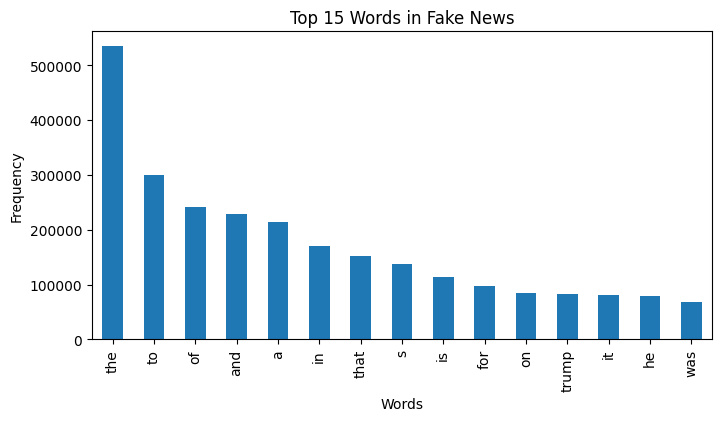

In [51]:
plot_most_frequent_words(fake_text, 'Top 15 Words in Fake News')

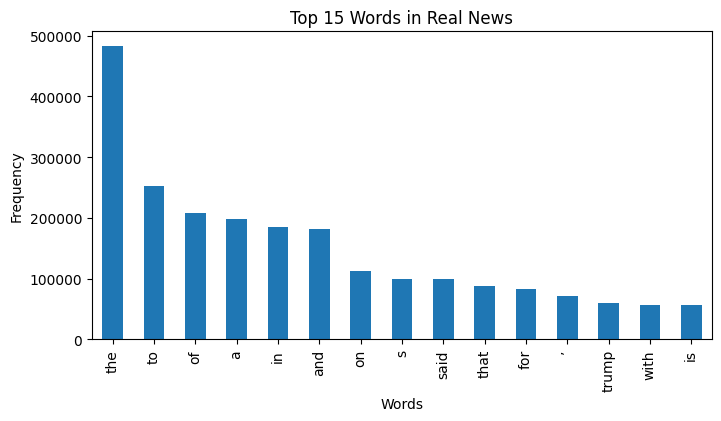

In [52]:
plot_most_frequent_words(real_text, 'Top 15 Words in Real News')

In [53]:
df_all.head()

,class,texts,tokens,cleaned_tokens,cleaned_texts,word_count,sentence_count
0,0,donald trump sends out embarrassing new year’...,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, out, embarrassing, new,...",donald trump sends out embarrassing new year ’...,506,38
1,0,drunk bragging trump staffer started russian ...,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus...",drunk bragging trump staffer started russian c...,313,20
2,0,sheriff david clarke becomes an internet joke...,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, an, internet...",sheriff david clarke becomes an internet joke ...,597,48
3,0,trump is so obsessed he even has obama’s name...,"[trump, is, so, obsessed, he, even, has, obama...","[trump, is, so, obsessed, he, even, has, obama...",trump is so obsessed he even has obama ’ s nam...,462,34
4,0,pope francis just called out donald trump dur...,"[pope, francis, just, called, out, donald, tru...","[pope, francis, just, called, out, donald, tru...",pope francis just called out donald trump duri...,431,20


In [54]:
summary_stats = df_all.describe()

<ipython-input-55-1df7862ff2fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_all.corr()


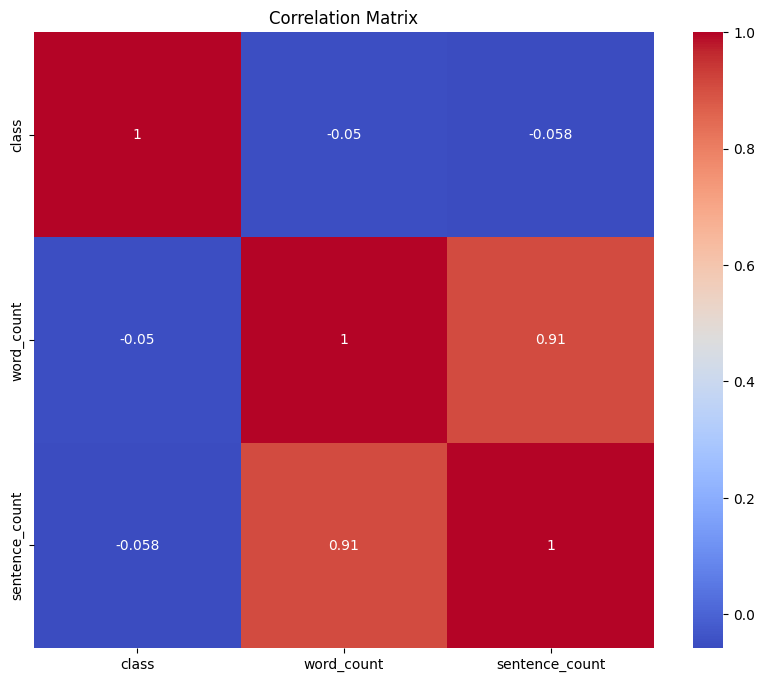

In [55]:
# Correlation Analysis
correlation_matrix = df_all.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

In [57]:
X = df_all['cleaned_texts']
y = df_all['class']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [60]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_tfidf, y_train)

In [61]:
# Training the model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [62]:
# Evaluating on training data
y_pred_train = logistic_regression.predict(X_train_tfidf)
training_accuracy = accuracy_score(y_train, y_pred_train)
training_classification_report = classification_report(y_train, y_pred_train)

In [63]:
# Evaluating on testing data
y_pred_test = logistic_regression.predict(X_test_tfidf)
testing_accuracy = accuracy_score(y_test, y_pred_test)
testing_classification_report = classification_report(y_test, y_pred_test)

In [64]:
#Print results for training data
print(f'Training Accuracy: {training_accuracy}')
print('==Training Classification Report ==')
print(training_classification_report)

Training Accuracy: 0.9918703714015257
==Training Classification Report ==
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18748
           1       0.99      0.99      0.99     17170

    accuracy                           0.99     35918
   macro avg       0.99      0.99      0.99     35918
weighted avg       0.99      0.99      0.99     35918



In [65]:
#Print results for testing data
print(f'Testing Accuracy: {testing_accuracy}')
print('Testing Classification Report:')
print(testing_classification_report)

Testing Accuracy: 0.9883073496659243
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [66]:
# Comparing accuracy
accuracy_difference = training_accuracy - testing_accuracy
print(f'Accuracy Difference: {accuracy_difference}')
if accuracy_difference > 0.05:
    print('Significant accuracy difference detected. Model might be overfitting.')
elif accuracy_difference < -0.05:
    print('Significant accuracy difference detected. Model might be underfitting.')
else:
    print('Minimal accuracy difference. Model seems to be generalizing well.')

Accuracy Difference: 0.0035630217356014127
Minimal accuracy difference. Model seems to be generalizing well.


In [67]:
# Calculating average accuracy
average_accuracy = (training_accuracy + testing_accuracy) / 2
print(f'Average Accuracy: {average_accuracy}')

Average Accuracy: 0.990088860533725


In [68]:
# Function to predict fake news
def predict_fake_news(text):
    text_tfidf = vectorizer.transform([text])
    prediction = logistic_regression.predict(text_tfidf)
    if prediction[0] == 0:
        return "Fake News"
    else:
        return "True News"

# Test the model with input text
input_text = str(input())
result = predict_fake_news(input_text)
print(f"Prediction: {result}")

India won the World Cup 202 3
Prediction: Fake News
